In [8]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
def get_D(N):
    # return (N+1) x (N+1) differential matrix D
    D = np.zeros((N+1, N+1))
    for i in range(0, N+1):
        for j in range(0,N+1):
            if i == j:
                D[i][j] = -1 * N/2
            if (i + 1) == j:
                D[i][j] = 1 * N/2
    return D

def get_f1(N):
    # return (N+1) x (N+1) differential matrix F1
    F = np.zeros((N+1, N+1))
    F_xx = np.zeros((N+1, N+1))
    F_yy = np.zeros((N+1, N+1))
    F_xy = np.zeros((N+1, N+1))
    for i in range(0,N+1):
        for j in range(0,N+1):
            x = -1 + (2*i)/N
            y = -1 + (2*j)/N
            F[i][j] = x**2 + y**2
            F_xx[i][j] = 2
            F_yy[i][j] = 2
            F_xy[i][j] = 0
    return F, F_xx, F_yy, F_xy


def get_f2(N):
    # return (N+1) x (N+1) differential matrix F2
    F = np.zeros((N+1, N+1))
    F_xx = np.zeros((N+1, N+1))
    F_yy = np.zeros((N+1, N+1))
    F_xy = np.zeros((N+1, N+1))
    for i in range(0,N+1):
        for j in range(0,N+1):
            x = -1 + (2*i)/N
            y = -1 + (2*j)/N
            F[i][j] = y*np.sin(x) + x*np.cos(y)
            F_xx[i][j] = -y*np.sin(x)
            F_yy[i][j] = -x*np.cos(y)
            F_xy[i][j] = np.cos(x) - np.sin(y)
    return F, F_xx, F_yy, F_xy

def get_error(A,B, N):
    error = 0
    n = 0
    for i in range(0, N+1):
        for j in range(0, N+1):
            if abs(A[i][j] - B[i][j]) < 10:
                error += (A[i][j] - B[i][j])**2
                n += 1
    return (error**0.5)/n

In [16]:
f1_xx_error, f1_yy_error, f1_xy_error = [], [], []
f2_xx_error, f2_yy_error, f2_xy_error = [], [], []
Ns = [2, 4, 8, 16, 32, 64, 128, 256]
for N in Ns:
    D = get_D(N)
    D_t = np.transpose(D)
    f1, f1_xx, f1_yy, f1_xy = get_f1(N)
    f2, f2_xx, f2_yy, f2_xy = get_f2(N)

    f1_xx_ = np.matmul(np.matmul(D, D),f1)
    f1_yy_ = np.matmul(np.matmul(f1, D_t),D_t)
    f1_xy_ = np.matmul(np.matmul(D, f1),D_t)
    f2_xx_ = np.matmul(np.matmul(D, D),f2)
    f2_yy_ = np.matmul(np.matmul(f2, D_t),D_t)
    f2_xy_ = np.matmul(np.matmul(D, f2),D_t)

    f1_xx_error.append(get_error(f1_xx, f1_xx_, N))
    f1_yy_error.append(get_error(f1_yy, f1_yy_, N))
    f1_xy_error.append(get_error(f1_xy, f1_xy_, N))
    f2_xx_error.append(get_error(f2_xx, f2_xx_, N))
    f2_yy_error.append(get_error(f2_yy, f2_yy_, N))
    f2_xy_error.append(get_error(f2_xy, f2_xy_, N))


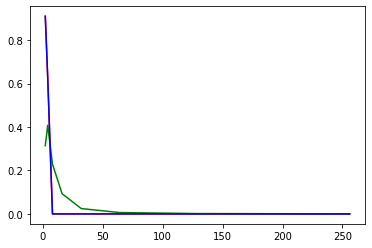

In [17]:
plt.plot(Ns, f1_xx_error, 'r')
plt.plot(Ns, f1_xy_error, 'g')
plt.plot(Ns, f1_yy_error, 'b')

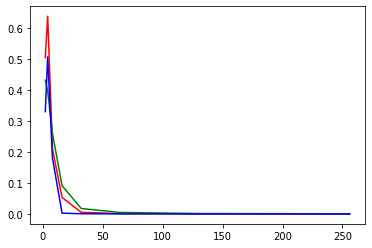

In [18]:
plt.plot(Ns, f2_xx_error, 'r')
plt.plot(Ns, f2_xy_error, 'g')
plt.plot(Ns, f2_yy_error, 'b')